In [65]:
import kepler_utils.yields.janka as janka
import scipy.interpolate
import kepler_utils.yields.yields as yld
import kepler_utils.yields.integrator as integrator
import astropy.units as u
import numpy as np
import astropy.constants as consts

janka_dir = "/Users/justinbrown/Dropbox/Research/Stan/Nucleosynthesis/links14/"
janka_calibrations = ["w15.0", "w18.0", "w20.0", "n20.0"]

lower_sn_limit = 8
remnant_approximation = "si"

for calibration in janka_calibrations:
    jp = None
    jps = []
    janka_files = ["results_%s_revised.txt" % calibration]
    for f in janka_files:
        jps.append (janka.JankaParser.readFrom (janka_dir + f))
        if jp is None:
            jp = jps [-1]
        else:
            jp += jps [-1]

    janka_imf = integrator.IMFIntegrator (jp [":M"])
    
    print ("Calibration: ", calibration)
    
    print ("E", janka_imf (jp [":E_exp"], mask = jp [":E_exp"] > 0.0 * u.erg, mask_frequency = True))
    
    print ("Ni Mass", janka_imf (jp [":with_fallback:M_outside(Ni)"], mask = jp [":E_exp"] > 0.0 * u.erg, mask_frequency = True), janka_imf (jp [":with_fallback:M_outside(Ni)"] + jp [":with_fallback:M_outside(Tr)"], mask = jp [":E_exp"] > 0.0 * u.erg, mask_frequency = True))
    
    newmasses = jp [":M"]
    new_imf = janka_imf
    mask = jp [":E_exp"].value > 0
    print ("Average SN Mass", new_imf (newmasses, mask = mask, mask_frequency = True))

    print ("%", new_imf (newmasses / newmasses, mask = mask), new_imf (newmasses / newmasses, mask = np.logical_and (newmasses > 20.0 * u.solMass, mask)) / new_imf (newmasses / newmasses, mask = mask))
    print (new_imf (newmasses / newmasses, mask = np.logical_and (newmasses > 20.0 * u.solMass, mask)) / new_imf (newmasses / newmasses, mask = mask))
    
    wdata = np.genfromtxt ("../wcores.dat", names = True)
    w_imf = integrator.IMFIntegrator (wdata ["Minit"])
    w_remnants = wdata [remnant_approximation] * u.solMass
        
    baryonic_masses = u.Quantity (list (w_remnants) + list (jp [":with_fallback:M_mass_cut_after_fb"]))
    
    baryonic_masses [baryonic_masses > 2.5 * u.solMass] = 0. * u.solMass
    integrated_baryonic_mass = (w_imf + janka_imf) (baryonic_masses, mask = baryonic_masses > 0.0 * u.solMass, mask_frequency = True)
    print ("M_remnant", integrated_baryonic_mass, integrated_baryonic_mass * (1 - 3.0 / 5.0 * consts.G * integrated_baryonic_mass / (12 * u.km * consts.c ** 2)))
    
#     full_imf = integrator.IMFIntegrator (np.arange (9,15,0.1) * u.solMass)) + 
    
#     mask = np.array (list (np.arange (9,15,0.1)>0) + list (jp [":E_exp"].value > 0)), dtype = bool)
#     print (new_imf (newmasses, mask = mask, mask_frequency = True))
#     print (new_imf (newmasses / newmasses, mask = mask))

Calibration:  w15.0
E 7.020825074388177e+50 erg
Ni Mass 0.043913229711219894 solMass 0.054657474975486404 solMass
Average SN Mass 14.40349659270851 solMass
% 0.6321283734419516 0.08695786396950189
0.08695786396950189
M_remnant 1.5385486901607475 solMass 1.3637317573827592 solMass
Calibration:  w18.0
E 7.393352094162265e+50 erg
Ni Mass 0.04660127114954473 solMass 0.058228533024405164 solMass
Average SN Mass 14.59030823254528 solMass
% 0.6454122115866211 0.1002233947383398
0.1002233947383398
M_remnant 1.5441815777822332 solMass 1.368082232866112 solMass
Calibration:  w20.0
E 5.998032785730114e+50 erg
Ni Mass 0.036149187461668154 solMass 0.04389640638859812 solMass
Average SN Mass 12.364339343151762 solMass
% 0.49485399894005083 0.03971822283803301
0.03971822283803301
M_remnant 1.5387882592043287 solMass 1.3639168803287922 solMass
Calibration:  n20.0
E 8.935463150339316e+50 erg
Ni Mass 0.053135638647085315 solMass 0.07129796100063564 solMass
Average SN Mass 17.50134194628842 solMass
% 0.7

In [177]:
import numpy as np

In [178]:
from kepler_utils.yields.yields import YieldReader
from kepler_utils.yields.integrator import IMFIntegrator, Integrator
import astropy.units as u
import numpy as np

from kepler_utils.plots.yields import YieldPlot


In [9]:
n20yr = YieldReader (directory = "../yields/y_data_N20_special_13x6_120/", masses = np.array (list (np.arange (13.6, 30.0, 0.1)) + [31, 32, 33, 35, 40, 45, 50, 55, 60, 70, 80, 100, 120]) * u.solMass, winds = False)
w18yr = YieldReader (directory = "../yields/y_data_W18_special_13x6_14x9/", masses = np.arange (13.6, 14.9, 0.1) * u.solMass, winds = False)
w18yr += YieldReader (directory = "../yields/y_data_W18_special_15x0_30x0/", masses = np.arange (15.0, 30.0, 0.1) * u.solMass, winds = False)
w18yr += YieldReader (directory = "../yields/y_data_W18_special_31_120/", masses = np.array ([31, 32, 33, 35, 40, 45, 50, 55, 60, 70, 80, 100, 120]) * u.solMass, winds = False)
whyr = YieldReader (directory = "../yields/wh07/", explosions = False)

NameError: name 'w18yr' is not defined

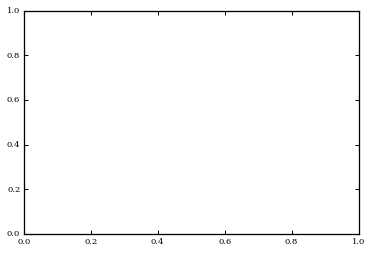

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots (1, 1)

iso = "mg24"
ax.plot (w18yr.masses.to (u.solMass) [w18yr.get_yield (iso) > 0.0 * u.solMass], w18yr.get_yield (iso) [w18yr.get_yield (iso) > 0.0 * u.solMass])
ax.plot (whyr.masses.to (u.solMass), whyr.get_yield (iso))
# ax.set_yscale ("log")

ax.set_xlim ((15, 35))

In [56]:
wdata = np.genfromtxt ("../wcores.dat", names = True)
w_imf = integrator.IMFIntegrator (wdata ["Minit"])
w_remnants = wdata [remnant_approximation] * u.solMass

baryonic_masses = u.Quantity (list (w_remnants) + list (jp [":with_fallback:M_mass_cut_after_fb"]))
# baryonic_masses = u.Quantity (list (jp [":with_fallback:M_mass_cut_after_fb"]))

baryonic_masses [baryonic_masses > 2.5 * u.solMass] = 0. * u.solMass
# numbers = (janka_imf).freq [baryonic_masses > 0.0 * u.solMass]
numbers = (w_imf + janka_imf).freq [baryonic_masses > 0.0 * u.solMass]

In [57]:
tohist = [x for sublist in [[mass] * int (number) for mass, number in zip (baryonic_masses [baryonic_masses > 0.0 * u.solMass], numbers * 1000)] for x in sublist]

In [58]:
from scipy.interpolate import interp1d

interpolator = interp1d ((w_imf + janka_imf).masses, baryonic_masses)

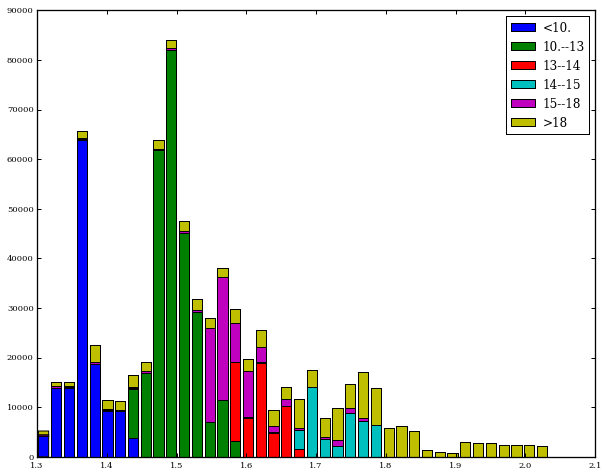

In [66]:
x = np.random.rand (1000000)
x = (((1 - x) * max ((w_imf + janka_imf).masses) ** (-1.35) + x * min ((w_imf + janka_imf).masses) ** (-1.35)) ** (1. / -1.35)).value

plt.figure (figsize = (10,8))

dx1 = x [x < 10.]
inter1 = interpolator (dx1)

dx2 = x [np.logical_and (10. < x, x < 13.)]
inter2 = interpolator (dx2)

dx3 = x [np.logical_and (13. < x, x < 14)]
inter3 = interpolator (dx3)

dx6 = x [np.logical_and (14. < x, x < 15)]
inter6 = interpolator (dx6)

dx4 = x [np.logical_and (15 < x, x < 18)]
inter4 = interpolator (dx4)

dx5 = x [x > 18]
inter5 = interpolator (dx5)


# num, bins, patches = plt.hist ([inter1 [inter1 > 1.3],inter2[inter2 > 1.3]], 
num, bins, patches = plt.hist ([inter1 [inter1 > 1.3],inter2[inter2 > 1.3],inter3[inter3 > 1.3],inter6[inter6 > 1.3],inter4[inter4 > 1.3], inter5 [inter5 > 1.3]], 
                               40, stacked = True, label = ["<10.","10.--13","13--14","14--15","15--18",">18"])

plt.legend (loc = "upper right")

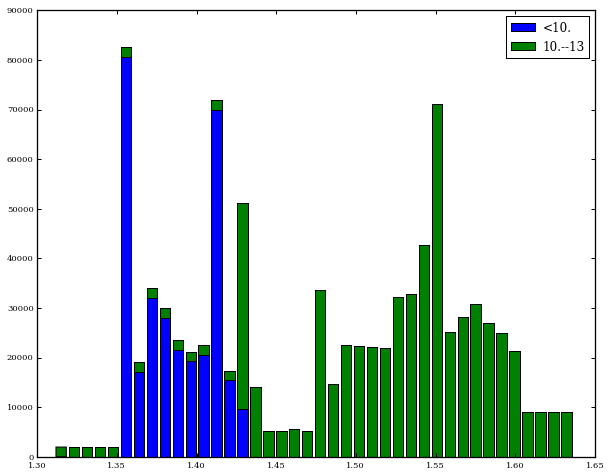

In [55]:
x = np.random.rand (1000000)
x = (((1 - x) * max ((w_imf).masses) ** (-1.35) + x * min ((w_imf).masses) ** (-1.35)) ** (1. / -1.35)).value

plt.figure (figsize = (10,8))

dx1 = x [x < 10.]
inter1 = interpolator (dx1)

dx2 = x [np.logical_and (10. < x, x < 13.)]
inter2 = interpolator (dx2)

dx3 = x [np.logical_and (13. < x, x < 14)]
inter3 = interpolator (dx3)

dx6 = x [np.logical_and (14. < x, x < 15)]
inter6 = interpolator (dx6)

dx4 = x [np.logical_and (15 < x, x < 18)]
inter4 = interpolator (dx4)

dx5 = x [x > 18]
inter5 = interpolator (dx5)

num, bins, patches = plt.hist ([inter1 [inter1 > 1.3],inter2[inter2 > 1.3]], 
                               40, stacked = True, label = ["<10.","10.--13","13--14","14--15","15--18",">18"])

plt.legend (loc = "upper right")

In [25]:
x

<Quantity [ 16.23480422, 31.2693043 , 10.38821241,...,  18.24555277,
            13.81924687, 15.58801506] solMass>

In [60]:
baryonic_masses

<Quantity [ 1.356, 1.36 , 1.371, 1.377, 1.313, 1.436, 1.5  , 1.466, 1.516,
            1.491, 1.516, 1.464, 1.543, 1.522, 1.537, 1.531, 1.536, 1.561,
            1.56 , 1.589, 1.591, 1.59 , 1.596, 1.615, 1.614, 1.623, 1.629,
            1.651, 1.658, 1.67 , 1.691, 1.693, 1.695, 1.72 , 1.762, 1.747,
            1.766, 1.781, 1.784, 0.   , 0.   , 1.552, 0.   , 0.   , 0.   ,
            0.   , 1.569, 1.558, 1.671, 1.54 , 1.589, 1.551, 1.553, 1.55 ,
            1.553, 1.559, 1.554, 1.566, 1.566, 1.568, 1.577, 0.   , 1.608,
            1.603, 1.587, 1.598, 1.63 , 0.   , 1.769, 1.715, 1.79 , 1.768,
            1.808, 1.823, 1.566, 0.   , 1.631, 1.781, 1.833, 1.835, 1.825,
            1.623, 1.499, 1.668, 0.   , 0.   , 1.37 , 1.443, 0.   , 0.   ,
            1.718, 1.428, 1.498, 1.382, 1.371, 1.898, 0.   , 1.745, 0.   ,
            1.508, 1.551, 1.917, 0.   , 0.   , 1.617, 1.637, 1.799, 0.   ,
            0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
            0.   , 0.   ,

In [61]:
w_imf.masses

<Quantity [ 9.  , 9.25, 9.3 , 9.4 ]>